# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
#output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# URL for GET requests to retrieve vehicle data
query_url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key

cit = []
lat = []
lng = []
temp = []
hum = []
cloud = []
wind = []
country = []
date = []

print("Beginning Data Retrieval")
print("-----------------------------")

n = 0
# Loop through a list of cities and perform a request for data on each
for city in cities:
    try:
        n = n + 1
        response = requests.get(query_url + '&q=' + city).json()
        #print(response)
        print("Processing Record " + str(n) + " of Set 1 | " + response['name'])
        cit.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
    except KeyError:
        print("City not found. Skipping...")

#print(f"The latitude information received is: {lat}")
#print(f"The temperature information received is: {temp}")
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Along
Processing Record 2 of Set 1 | Bandarbeyla
Processing Record 3 of Set 1 | Shaunavon
Processing Record 4 of Set 1 | Upernavik
Processing Record 5 of Set 1 | George Town
Processing Record 6 of Set 1 | Hāflong
Processing Record 7 of Set 1 | Kapaa
Processing Record 8 of Set 1 | Hermanus
Processing Record 9 of Set 1 | The Valley
Processing Record 10 of Set 1 | Hithadhoo
Processing Record 11 of Set 1 | Rikitea
Processing Record 12 of Set 1 | Mataura
Processing Record 13 of Set 1 | Jamestown
Processing Record 14 of Set 1 | Grindavik
Processing Record 15 of Set 1 | Cape Town
Processing Record 16 of Set 1 | Castro
Processing Record 17 of Set 1 | Ushuaia
Processing Record 18 of Set 1 | Port Elizabeth
Processing Record 19 of Set 1 | Oxford
Processing Record 20 of Set 1 | Butaritari
Processing Record 21 of Set 1 | Fairbanks
Processing Record 22 of Set 1 | Busselton
Processing Record 23 of Set 1 | Horta
Proc

City not found. Skipping...
Processing Record 202 of Set 1 | Beyneu
Processing Record 203 of Set 1 | Ludvika
Processing Record 204 of Set 1 | Bubaque
Processing Record 205 of Set 1 | Kamenka
Processing Record 206 of Set 1 | Hambantota
Processing Record 207 of Set 1 | Salalah
Processing Record 208 of Set 1 | Hay River
Processing Record 209 of Set 1 | Yangi Marg`ilon
Processing Record 210 of Set 1 | Airai
Processing Record 211 of Set 1 | Lodeynoye Pole
Processing Record 212 of Set 1 | Gobabis
Processing Record 213 of Set 1 | Iqaluit
Processing Record 214 of Set 1 | Pangai
City not found. Skipping...
Processing Record 216 of Set 1 | Muros
Processing Record 217 of Set 1 | Sorong
Processing Record 218 of Set 1 | Tripoli
Processing Record 219 of Set 1 | Lavrentiya
Processing Record 220 of Set 1 | Fayaoué
Processing Record 221 of Set 1 | Chornoliztsi
Processing Record 222 of Set 1 | Ji’an
Processing Record 223 of Set 1 | Lompoc
Processing Record 224 of Set 1 | Holme
Processing Record 225 of S

Processing Record 400 of Set 1 | Rong Kwang
Processing Record 401 of Set 1 | Kutum
Processing Record 402 of Set 1 | Buchanan
Processing Record 403 of Set 1 | Comodoro Rivadavia
Processing Record 404 of Set 1 | Moshenskoye
Processing Record 405 of Set 1 | Jalu
Processing Record 406 of Set 1 | Batticaloa
Processing Record 407 of Set 1 | Pemangkat
Processing Record 408 of Set 1 | Palana
Processing Record 409 of Set 1 | Paamiut
Processing Record 410 of Set 1 | Broken Hill
Processing Record 411 of Set 1 | Liverpool
Processing Record 412 of Set 1 | Nanortalik
City not found. Skipping...
Processing Record 414 of Set 1 | Güzelyurt
Processing Record 415 of Set 1 | Meulaboh
Processing Record 416 of Set 1 | Sucúa
Processing Record 417 of Set 1 | Bridlington
Processing Record 418 of Set 1 | Freeport
Processing Record 419 of Set 1 | Zhuhai
Processing Record 420 of Set 1 | Perelyub
Processing Record 421 of Set 1 | Guadalupe y Calvo
Processing Record 422 of Set 1 | Parrita
Processing Record 423 of Se

Processing Record 596 of Set 1 | Port Blair
Processing Record 597 of Set 1 | Tecolutla
Processing Record 598 of Set 1 | Pitimbu
Processing Record 599 of Set 1 | Wanning
Processing Record 600 of Set 1 | Yenagoa
Processing Record 601 of Set 1 | Mumbai
Processing Record 602 of Set 1 | Nurota
Processing Record 603 of Set 1 | Kismayo
Processing Record 604 of Set 1 | Santa Cruz do Sul
Processing Record 605 of Set 1 | Fort Nelson
Processing Record 606 of Set 1 | Kidal
Processing Record 607 of Set 1 | Vila Franca do Campo
Processing Record 608 of Set 1 | Nabire
Processing Record 609 of Set 1 | Udachny
Processing Record 610 of Set 1 | Valle de Allende
Processing Record 611 of Set 1 | Alice Springs
Processing Record 612 of Set 1 | Mossamedes
Processing Record 613 of Set 1 | Esil
Processing Record 614 of Set 1 | Strezhevoy
City not found. Skipping...
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Combine list into dataframe
data = pd.DataFrame({'City':cit,'Lat':lat,'Lng':lng,'Max Temp':temp,'Humidity':hum,'Cloudiness':cloud,'Wind Speed':wind,'Country':country,'Date':date})
data.head(5)

outputpath = 'a.csv'
data.to_csv (outputpath,sep= ',' ,index= False ,header= True)

In [8]:
# show the dataframe summary
data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,5.730000e+02
mean,22.080538,14.304859,290.906405,67.108202,55.041885,4.152426,1.665411e+09
std,33.108713,88.573192,10.558085,22.378783,40.463940,2.871322,1.654555e+02
min,-54.800000,-175.200000,256.170000,1.000000,0.000000,0.000000,1.665410e+09
25%,-5.226900,-63.057800,283.650000,56.000000,10.000000,2.060000,1.665410e+09
50%,27.117200,20.259700,291.960000,72.000000,62.000000,3.580000,1.665411e+09
75%,50.233400,80.264400,299.180000,84.000000,99.000000,5.590000,1.665411e+09
max,78.218600,178.416700,313.230000,100.000000,100.000000,19.120000,1.665411e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# skip the humidity > 100%
data = data.drop(data[data.Humidity > 100].index)
data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,5.730000e+02
mean,22.080538,14.304859,290.906405,67.108202,55.041885,4.152426,1.665411e+09
std,33.108713,88.573192,10.558085,22.378783,40.463940,2.871322,1.654555e+02
min,-54.800000,-175.200000,256.170000,1.000000,0.000000,0.000000,1.665410e+09
25%,-5.226900,-63.057800,283.650000,56.000000,10.000000,2.060000,1.665410e+09
50%,27.117200,20.259700,291.960000,72.000000,62.000000,3.580000,1.665411e+09
75%,50.233400,80.264400,299.180000,84.000000,99.000000,5.590000,1.665411e+09
max,78.218600,178.416700,313.230000,100.000000,100.000000,19.120000,1.665411e+09


In [10]:
#  Get the indices of cities that have humidity over 100%.
print(data[data.Humidity > 100].index)

Int64Index([], dtype='int64')


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = data.drop(data[data.Humidity > 100].index, inplace=False)
clean_city_data.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Along,28.1667,94.7667,294.64,99,100,0.17,IN,1665410412
1,Bandarbeyla,9.4942,50.8122,299.67,79,64,6.12,SO,1665410293
2,Shaunavon,49.6501,-108.4181,282.92,51,7,4.61,CA,1665410413
3,Upernavik,72.7868,-56.1549,262.45,70,15,2.22,GL,1665410256
4,George Town,5.4112,100.3354,302.11,76,20,0.00,MY,1665410414


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

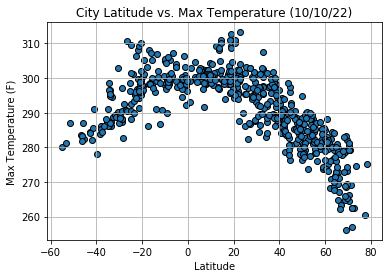

In [12]:
# show the scatter plot
#clean_city_data.plot(x='Lat', y='Max Temp', kind='bar')
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (10/10/22)")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

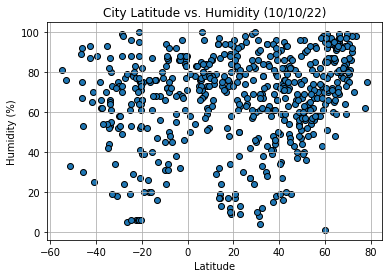

In [13]:
# show the scatter plot
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (10/10/22)")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

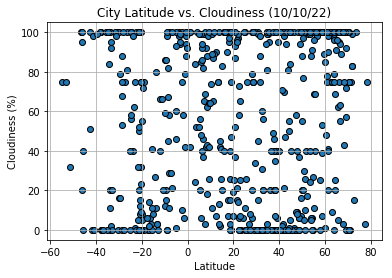

In [14]:
# show the scatter plot
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (10/10/22)")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

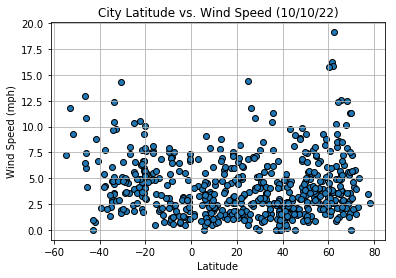

In [15]:
# show the scatter plot
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (10/10/22)")
plt.grid()
plt.show()

## Linear Regression

In [16]:
# separate the dataset into Northern and Southern
Northern_city_data = clean_city_data[clean_city_data['Lat'] >= 0]
Southern_city_data = clean_city_data[clean_city_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8643701344533194


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2020: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:249: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


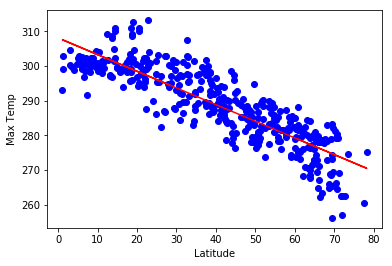

In [17]:
# show the scatter plot and linear regression
slope, intercept, r_value, p_value, std_err = linregress(Northern_city_data['Lat'], Northern_city_data['Max Temp'])
print("The r-value is: " + str(r_value))

plt.scatter(Northern_city_data['Lat'], Northern_city_data['Max Temp'], color="b")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.plot(Northern_city_data['Lat'], intercept + slope * Northern_city_data['Lat'], color="r")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6849075799835019


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2020: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:249: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


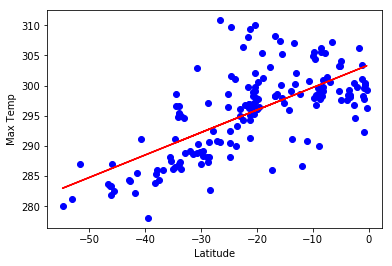

In [18]:
# show the scatter plot and linear regression
slope, intercept, r_value, p_value, std_err = linregress(Southern_city_data['Lat'], Southern_city_data['Max Temp'])
print("The r-value is: " + str(r_value))

plt.scatter(Southern_city_data['Lat'], Southern_city_data['Max Temp'], color="b")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.plot(Southern_city_data['Lat'], intercept + slope * Southern_city_data['Lat'], color="r")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.19688883622321895


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2020: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:249: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


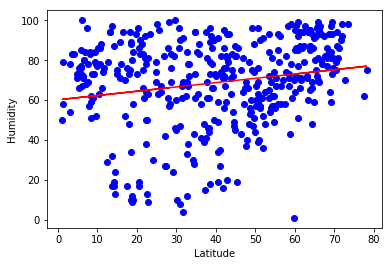

In [19]:
# show the scatter plot and linear regression
slope, intercept, r_value, p_value, std_err = linregress(Northern_city_data['Lat'], Northern_city_data['Humidity'])
print("The r-value is: " + str(r_value))

plt.scatter(Northern_city_data['Lat'], Northern_city_data['Humidity'], color="b")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.plot(Northern_city_data['Lat'], intercept + slope * Northern_city_data['Lat'], color="r")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.07649679247747801


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2020: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:249: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


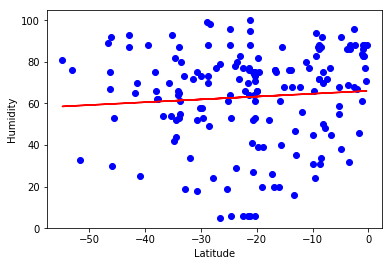

In [20]:
# show the scatter plot and linear regression
slope, intercept, r_value, p_value, std_err = linregress(Southern_city_data['Lat'], Southern_city_data['Humidity'])
print("The r-value is: " + str(r_value))

plt.scatter(Southern_city_data['Lat'], Southern_city_data['Humidity'], color="b")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.plot(Southern_city_data['Lat'], intercept + slope * Southern_city_data['Lat'], color="r")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.14955930485544675


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2020: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:249: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


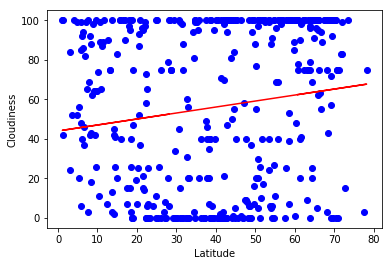

In [21]:
# show the scatter plot and linear regression
slope, intercept, r_value, p_value, std_err = linregress(Northern_city_data['Lat'], Northern_city_data['Cloudiness'])
print("The r-value is: " + str(r_value))

plt.scatter(Northern_city_data['Lat'], Northern_city_data['Cloudiness'], color="b")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.plot(Northern_city_data['Lat'], intercept + slope * Northern_city_data['Lat'], color="r")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.01628665435446434


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2020: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:249: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


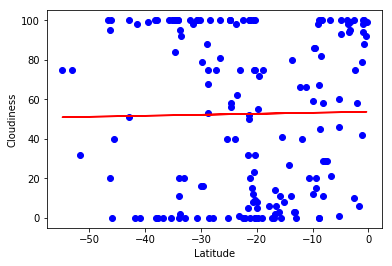

In [22]:
# show the scatter plot and linear regression
slope, intercept, r_value, p_value, std_err = linregress(Southern_city_data['Lat'], Southern_city_data['Cloudiness'])
print("The r-value is: " + str(r_value))

plt.scatter(Southern_city_data['Lat'], Southern_city_data['Cloudiness'], color="b")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.plot(Southern_city_data['Lat'], intercept + slope * Southern_city_data['Lat'], color="r")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.2064452932719823


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2020: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:249: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


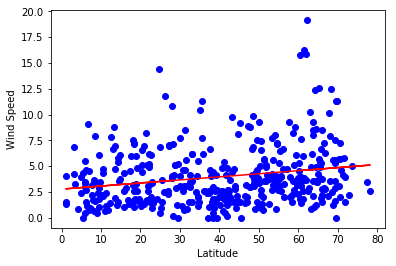

In [23]:
# show the scatter plot and linear regression
slope, intercept, r_value, p_value, std_err = linregress(Northern_city_data['Lat'], Northern_city_data['Wind Speed'])
print("The r-value is: " + str(r_value))

plt.scatter(Northern_city_data['Lat'], Northern_city_data['Wind Speed'], color="b")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.plot(Northern_city_data['Lat'], intercept + slope * Northern_city_data['Lat'], color="r")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.32794973114643894


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2020: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:249: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


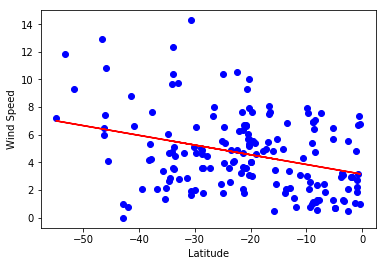

In [24]:
# show the scatter plot and linear regression
slope, intercept, r_value, p_value, std_err = linregress(Southern_city_data['Lat'], Southern_city_data['Wind Speed'])
print("The r-value is: " + str(r_value))

plt.scatter(Southern_city_data['Lat'], Southern_city_data['Wind Speed'], color="b")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.plot(Southern_city_data['Lat'], intercept + slope * Southern_city_data['Lat'], color="r")
plt.show()